---
# Session 7 - Data Visualization

---

<Axes: xlabel='gdppc', ylabel='life_exp'>

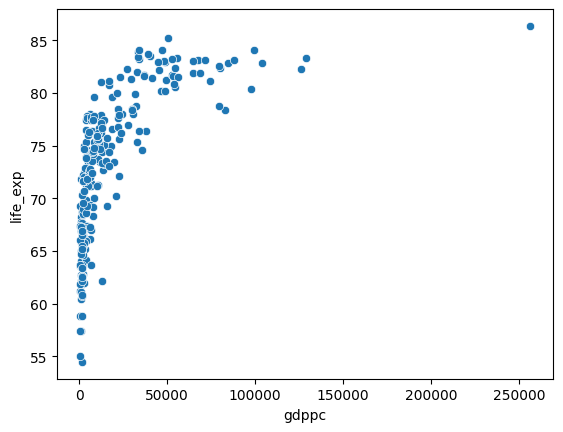

In [ ]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download data
df = wb.data.DataFrame(["SP.DYN.LE00.IN", "NY.GDP.PCAP.CD"],
                       time=2023, labels=True).reset_index()

# Prepare data
wb_data_cs = df[["Country", "SP.DYN.LE00.IN", "NY.GDP.PCAP.CD"]].rename(columns={
    "SP.DYN.LE00.IN": "life_exp",
    "NY.GDP.PCAP.CD": "gdppc"
}).dropna()

# Plot
sns.scatterplot(data=wb_data_cs, x="gdppc", y="life_exp")

---
## Adding More Layers

In [ ]:
import wbgapi as wb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download and prepare data
df = wb.data.DataFrame("SP.DYN.LE00.IN",
                       ["DEU", "FRA", "USA", "CHN", "IND"],
                       time=range(2000, 2024), labels=True).reset_index()

df_long = df.melt(id_vars=["Country"], var_name="Year", value_name="Life_expectancy")
df_long = df_long[df_long["Year"].str.startswith("YR")]
df_long["Year"] = df_long["Year"].str[2:].astype(int)

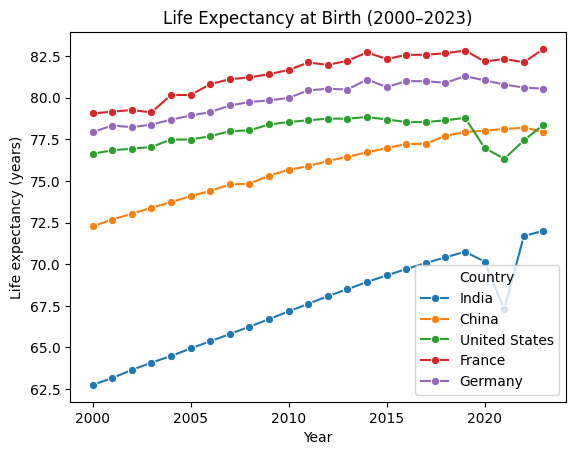

In [ ]:
# Plot with seaborn
sns.lineplot(data=df_long, x="Year", y="Life_expectancy", hue="Country", marker="o")
plt.title("Life Expectancy at Birth (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.show()

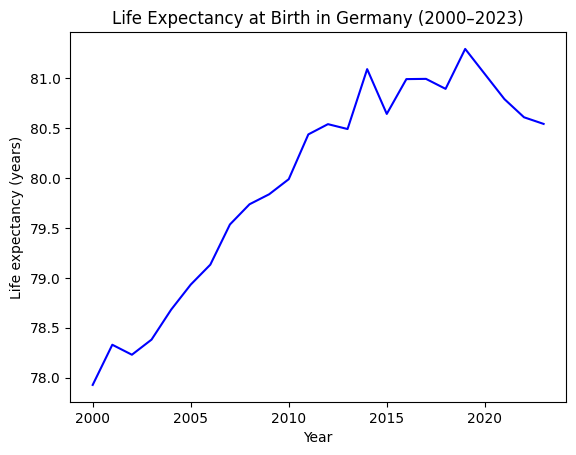

In [ ]:
# Filter to Germany only
df_germany = df_long[df_long["Country"] == "Germany"]

# Plot
sns.lineplot(data=df_germany, x="Year",
             y="Life_expectancy", marker="o", color="blue")
plt.title("Life Expectancy at Birth in Germany (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.show()

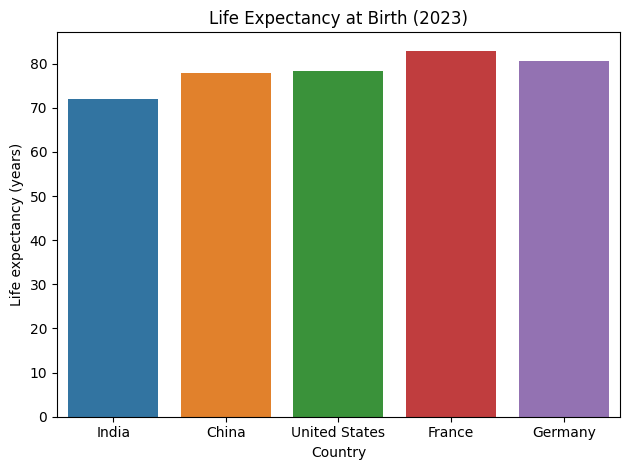

In [ ]:
# Filter for 2023
df_2023 = df_long[df_long["Year"] == 2023]

# Create bar chart
sns.barplot(data=df_2023, x="Country", y="Life_expectancy", hue="Country")
plt.title("Life Expectancy at Birth (2023)")
plt.xlabel("Country")
plt.ylabel("Life expectancy (years)")
plt.tight_layout()
plt.show()

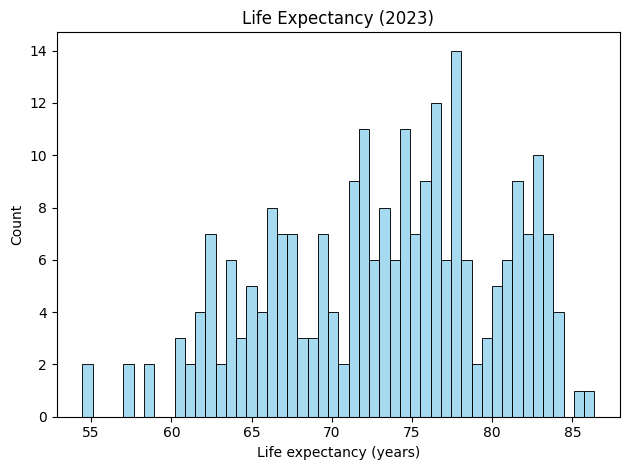

In [ ]:
# Histogram

# Plot histogram of Life Expectancy
sns.histplot(data=wb_data_cs, x="life_exp", bins=30, color="skyblue", edgecolor="black")
plt.title("Life Expectancy (2023)")
plt.xlabel("Life expectancy (years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

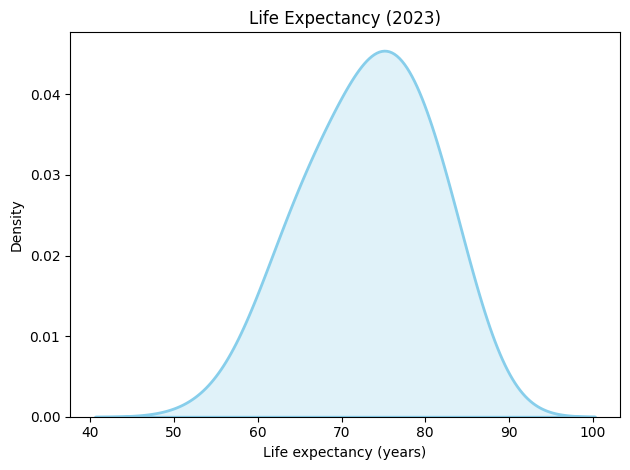

In [ ]:
# Density plot of Life Expectancy
sns.kdeplot(data=wb_data_cs, x='life_exp',
            fill=True, color='skyblue', linewidth=2, bw_adjust=0.5)
plt.title("Life Expectancy (2023)")
plt.xlabel("Life expectancy (years)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

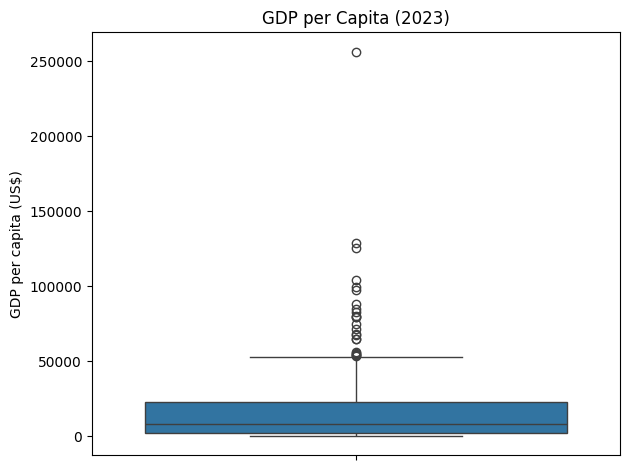

In [ ]:
# Boxplot of Life Expectancy 2023
sns.boxplot(data=wb_data_cs, y='gdppc')
plt.title("GDP per Capita (2023)")
plt.ylabel("GDP per capita (US$)")
plt.tight_layout()
plt.show()

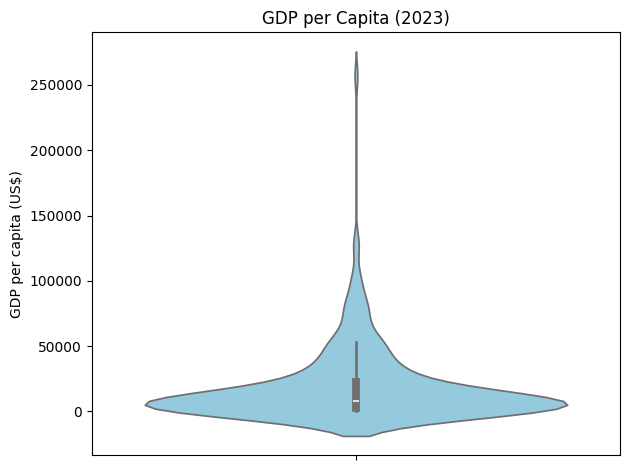

In [ ]:
# Violin Plot of GDP per Capita (2023)
sns.violinplot(data=wb_data_cs, y="gdppc", color="skyblue")
plt.title("GDP per Capita (2023)")
plt.ylabel("GDP per capita (US$)")
plt.tight_layout()
plt.show()

---
## Maps

In [ ]:
!pip install wbgapi geopandas pycountry

import wbgapi as wb, pandas as pd, pycountry, geopandas as gpd, matplotlib.pyplot as plt

# Download life expectancy data for 2023
df_2023 = wb.data.DataFrame('SP.DYN.LE00.IN', time=2023, labels=True)
df_2023 = df_2023.rename(columns={'SP.DYN.LE00.IN': 'life_exp'}).reset_index()
df_2023 = df_2023.dropna(subset=['life_exp'])

# Add ISO3 country codes using pycountry
def get_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df_2023['iso3c'] = df_2023['Country'].apply(get_iso3)

# Load Natural Earth country boundaries
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

# Merge with life expectancy data
world_life_exp = world.merge(df_2023, left_on="ADM0_A3", right_on="iso3c", how="left")

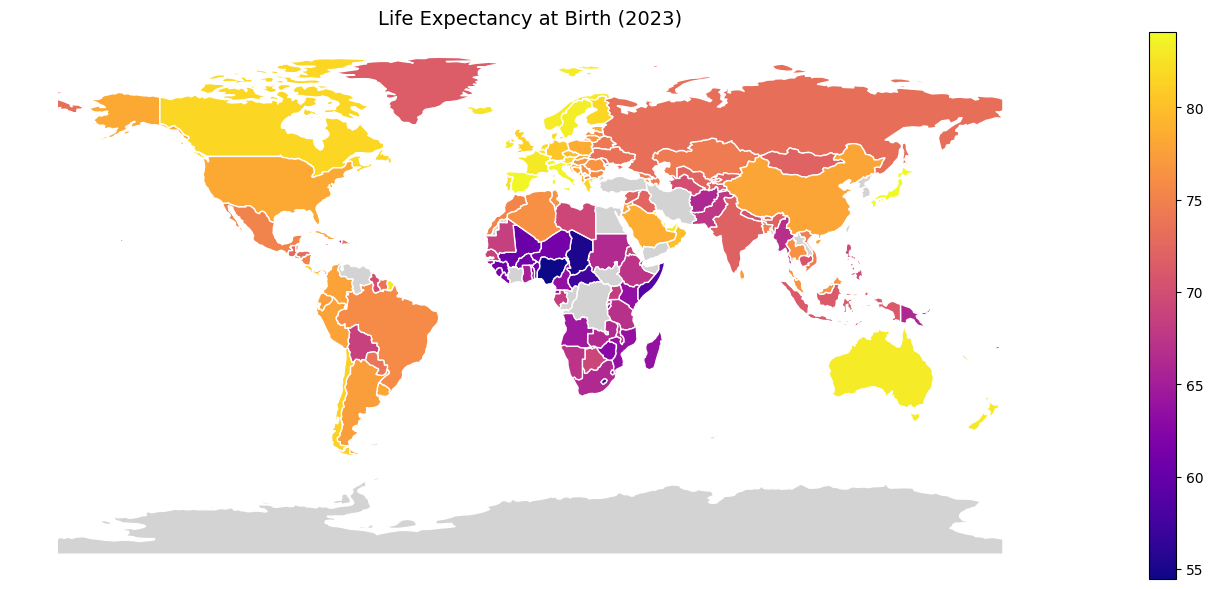

In [ ]:
# Plot choropleth map
fig, ax = plt.subplots(figsize=(20, 6))
world_life_exp.plot(
    column="life_exp", cmap="plasma", edgecolor="white",
    missing_kwds={"color": "lightgrey"}, legend=True, ax=ax
)

ax.set_title("Life Expectancy at Birth (2023)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

## Point map

In [ ]:
!pip install geopandas cartopy

import geopandas as gpd
import cartopy.io.shapereader as shpreader

# Load world countries and cities
world = gpd.read_file(shpreader.natural_earth(resolution='110m',
                                              category='cultural',
                                              name='admin_0_countries'))

cities = gpd.read_file(shpreader.natural_earth(resolution='110m',
                                               category='cultural',
                                               name='populated_places'))

# Filter Europe and capitals
europe = world[world["CONTINENT"] == "Europe"]
capitals = cities[
    cities["FEATURECLA"].str.contains("capital") &
    cities["ADM0NAME"].isin(europe["ADMIN"])
]

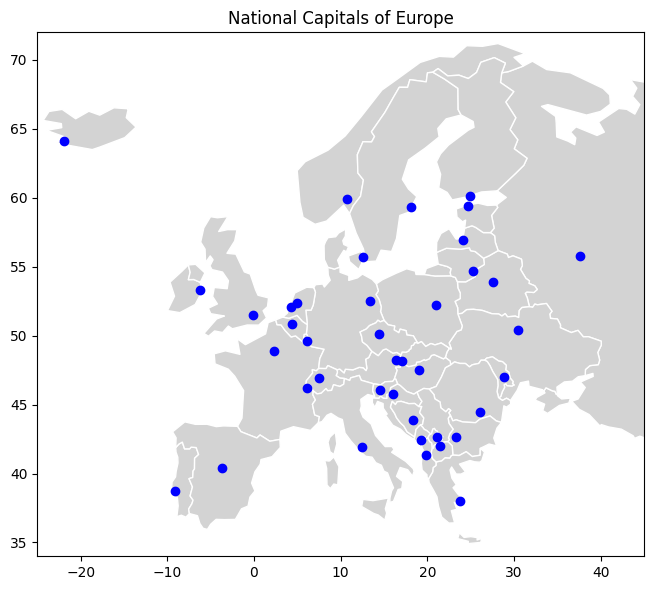

In [ ]:
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
europe.plot(ax=ax, color="lightgray",
            edgecolor="white")
capitals.plot(ax=ax, color="blue")
ax.set_xlim(-25, 45)
ax.set_ylim(34, 72)
ax.set_title("National Capitals of Europe")
plt.tight_layout()
plt.show()

## Bubble Map

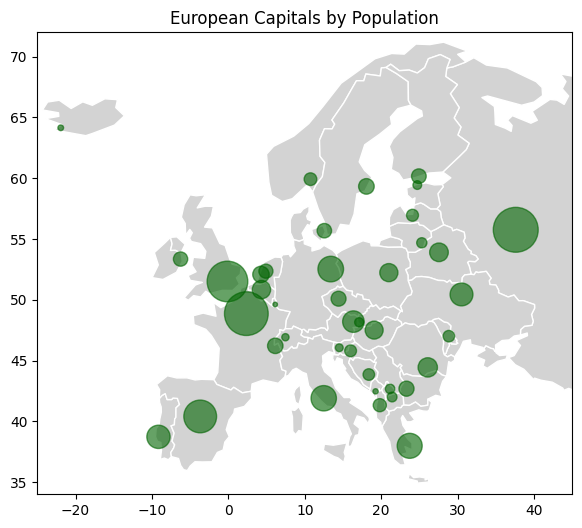

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
europe.plot(ax=ax, color="lightgray",
            edgecolor="white")
capitals.plot(
    ax=ax,
    color="darkgreen",
    alpha=0.6,
    markersize=capitals["POP_MAX"] / 10000
)

ax.set_xlim(-25, 45)
ax.set_ylim(34, 72)
ax.set_title("European Capitals by Population")
plt.tight_layout()
plt.show()